3
[(1, 3), (3, 5), (3, 6)]


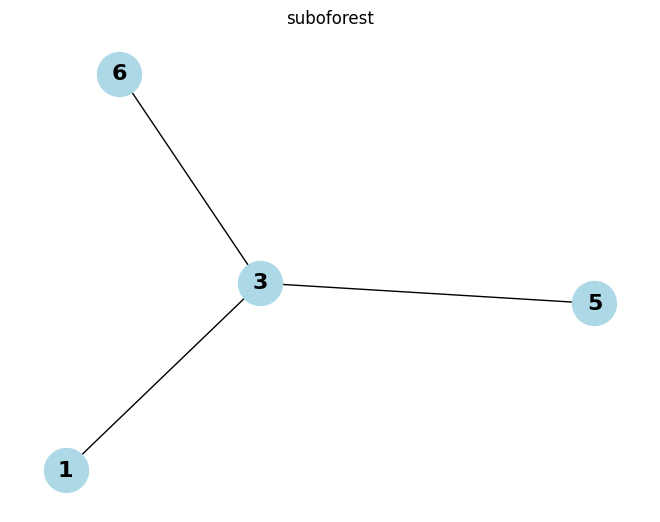

In [115]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import combinations

def initialize_population(G, population_size):
    population = []
    nodes = list(G.nodes())

    for _ in range(population_size):
        subgraph_nodes = random.sample(nodes, random.randint(2, len(nodes)))
        subgraph = G.subgraph(subgraph_nodes).copy()

        if nx.is_connected(subgraph):
            population.append(subgraph)

    return population


def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False



def calc_fitness(subgraph, H):
    
    if subgraph is None or subgraph.number_of_nodes() == 0:
        return 0
    if not nx.is_connected(subgraph):
        return 0
    if contains_isomorphic_subtree(subgraph, H):
        return 0
   
    return subgraph.number_of_edges()

def crossover(parent1, parent2, G):

    child = nx.Graph()
    for edge in parent1.edges():
        if random.random() > 0.5:
            child.add_edge(*edge)
    for edge in parent2.edges():
        if random.random() > 0.5 and not child.has_edge(*edge):
            child.add_edge(*edge)
            
    child = nx.intersection(G, child)

    return child
            

    
    
def mutation(subgraph, T):
    if random.random() > 0.5:
        possible_edges = list(set(T.edges()) - set(subgraph.edges()))
        if possible_edges:
            edge_to_add = random.choice(possible_edges)
            subgraph.add_edge(*edge_to_add)
    else:
        if subgraph.number_of_edges() > 0:
            edge_to_remove = random.choice(list(subgraph.edges()))
            subgraph.remove_edge(*edge_to_remove)
    
    return subgraph
        
def selection(population, tournament_size=5):
    best_fitness = None 
    index = -1
    for _ in range(tournament_size):
        individual = random.randrange(len(population))
        if calc_fitness(population[individual], H) < 0:
            best_fitness = calc_fitness(individual, H)
            index = individual
    return population[index]


def genetski(T, H, population_size = 50, generations = 100):

    population = initialize_population(G, population_size)
    new_population = []
    
    for generation in range(generations):
        population = sorted(population, key = lambda g: calc_fitness(g, H), reverse=True)
        best_fitness = calc_fitness(population[0], H)
        if best_fitness == T.number_of_nodes():
            break

        new_population[:population_size//5] = population[:population_size // 5]
        while len(new_population) < population_size:
            parent1 = selection(population, 5)
            parent2 = selection(population, 5)
            child = crossover(parent1, parent2, G)
            if random.random() < 0.1:
                child = mutation(child, G)
            new_population.append(child)

        population = new_population

    return population[0]



G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3),(3,5)])
H.append(h1)



h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)

h5 = nx.Graph()
h5.add_edges_from([(5, 3), (3, 1), (3, 6), (1, 2)])
H.append(h5)



best_subforest = genetski(G, H, population_size=50, generations = 100)
print(best_subforest.number_of_edges())
print(best_subforest.edges())



nx.draw(best_subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()

